In [2]:
import pandas as pd

df=pd.read_csv('/content/order_history_kaggle_data.csv')
df.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


# ***Stage 1 : Exploratory Data Analysis***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Restaurant ID                                       21321 non-null  int64  
 1   Restaurant name                                     21321 non-null  object 
 2   Subzone                                             21321 non-null  object 
 3   City                                                21321 non-null  object 
 4   Order ID                                            21321 non-null  int64  
 5   Order Placed At                                     21321 non-null  object 
 6   Order Status                                        21321 non-null  object 
 7   Delivery                                            21321 non-null  object 
 8   Distance                                            21321 non-null  object 


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

In [5]:
df.shape

(21321, 29)

In [6]:
df.dtypes

,0
Restaurant ID,int64
Restaurant name,object
Subzone,object
City,object
Order ID,int64
Order Placed At,object
Order Status,object
Delivery,object
Distance,object
Items in order,object


In [7]:
df['City'].nunique(),df['Delivery'].nunique(),df['Order Ready Marked'].nunique()

(1, 1, 3)

In [8]:
df['Order Ready Marked'].unique()

array(['Correctly', 'Incorrectly', 'Missed'], dtype=object)

In [9]:
df['Order Ready Marked'].unique()[0]

'Correctly'

In [10]:
df[df['Order Ready Marked']==df['Order Ready Marked'].unique()[0]].shape

(19087, 29)

In [11]:
df['Discount construct']

,Discount construct
0,40% off upto Rs.80
1,Flat Rs.175 off
2,40% off upto Rs.80
3,40% off upto Rs.80
4,40% off upto Rs.80
...,...
21316,50% off upto Rs.100
21317,Flat 15% off
21318,NaN
21319,NaN


In [12]:
df['Discount construct'].nunique()

527

In [13]:
df.isna().sum()

,0
Restaurant ID,0
Restaurant name,0
Subzone,0
City,0
Order ID,0
Order Placed At,0
Order Status,0
Delivery,0
Distance,0
Items in order,0


In [14]:
df.drop(columns=['Restaurant ID','City','Delivery','Rating','Review','Instructions','Cancellation / Rejection reason','Restaurant compensation (Cancellation)','Restaurant penalty (Rejection)','Customer complaint tag'],inplace=True)

In [15]:
df.columns

Index(['Restaurant name', 'Subzone', 'Order ID', 'Order Placed At',
       'Order Status', 'Distance', 'Items in order', 'Discount construct',
       'Bill subtotal', 'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked', 'Customer ID'],
      dtype='object')

In [16]:
df.drop(columns=['Customer ID'],inplace=True)

In [17]:
df.drop(columns=['Order ID'],inplace=True)

In [18]:
df.shape

(21321, 17)

In [19]:
df['Gold discount'].unique()

array([  0. ,  56. , 108.4,  38.4,  50. ,  46.4,  74.5,  98.3,  77.4,
        37.8,  95.8,  51. ,  42.3,  50.4,  78.5,  89.3,  60. ,  39.3,
        69. , 178.2,  93.3,  53. ,  49. , 280.1,  95.3,  49.3,  39.5,
        57.5,  55.5])

In [20]:
df['Restaurant discount (Flat offs, Freebies & others)'].nunique()

318

In [21]:
df.head()

,Restaurant name,Subzone,Order Placed At,Order Status,Distance,Items in order,Discount construct,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,KPT duration (minutes),Rider wait time (minutes),Order Ready Marked
0,Swaad,Sector 4,"11:38 PM, September 10 2024",Delivered,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",40% off upto Rs.80,715.0,31.75,80.0,0.0,0.0,0.0,666.75,18.35,11.6,Correctly
1,Swaad,Sector 4,"11:34 PM, September 10 2024",Delivered,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",Flat Rs.175 off,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,16.95,3.6,Correctly
2,Swaad,Sector 4,"03:52 PM, September 10 2024",Delivered,<1km,1 x Bone in Peri Peri Grilled Chicken,40% off upto Rs.80,310.0,11.50,80.0,0.0,0.0,0.0,241.50,14.05,12.2,Correctly
3,Swaad,Sector 4,"03:45 PM, September 10 2024",Delivered,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",40% off upto Rs.80,620.0,27.00,80.0,0.0,0.0,0.0,567.00,19.00,3.3,Correctly
4,Swaad,Sector 4,"03:04 PM, September 10 2024",Delivered,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",40% off upto Rs.80,584.0,25.20,80.0,0.0,0.0,0.0,529.20,15.97,1.0,Correctly


In [22]:
df.columns

Index(['Restaurant name', 'Subzone', 'Order Placed At', 'Order Status',
       'Distance', 'Items in order', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked'],
      dtype='object')

In [23]:
df['Restaurant name'].dtype

dtype('O')

In [24]:
from sklearn.preprocessing import LabelEncoder

col=['Restaurant name','Subzone','Order Status','Order Ready Marked']
for feature in col :
  le=LabelEncoder()
  df[feature]=le.fit_transform(df[feature])

In [25]:
import numpy as np

# First find '<1km' rows
mask=(df['Distance']=='<1km')

# Replace '<1km' with random float between 0 and 1
df.loc[mask,'Distance']=np.random.uniform(0,1,size=mask.sum())

# Now remove 'km' and convert to float for all rows
df['Distance']=df['Distance'].astype(str).str.replace('km','')
df['Distance']=df['Distance'].astype(float)


In [26]:
df['Order Placed At'] = pd.to_datetime(df['Order Placed At'], format='%I:%M %p, %B %d %Y')
df['hour'] = df['Order Placed At'].dt.hour
df['is_weekend'] = df['Order Placed At'].dt.weekday >= 5

In [27]:
df[df['is_weekend']==df['is_weekend'].unique()[0]].shape

(14440, 19)

In [28]:
df['item_count'] = df['Items in order'].str.count('x')

In [29]:
df.drop(['Items in order', 'Order Placed At', 'Discount construct'], axis=1, inplace=True)

In [30]:
df.head()

,Restaurant name,Subzone,Order Status,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,hour,is_weekend,item_count
0,3,4,0,3.000000,715.0,31.75,80.0,0.0,0.0,0.0,666.75,18.35,11.6,0,23,False,2
1,3,4,0,2.000000,1179.0,50.20,175.0,0.0,0.0,0.0,1054.20,16.95,3.6,0,23,False,3
2,3,4,0,0.916368,310.0,11.50,80.0,0.0,0.0,0.0,241.50,14.05,12.2,0,15,False,1
3,3,4,0,2.000000,620.0,27.00,80.0,0.0,0.0,0.0,567.00,19.00,3.3,0,15,False,2
4,3,4,0,2.000000,584.0,25.20,80.0,0.0,0.0,0.0,529.20,15.97,1.0,0,15,False,2


In [40]:
df.columns

Index(['Restaurant name', 'Subzone', 'Order Status', 'Distance',
       'Bill subtotal', 'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked', 'hour', 'is_weekend',
       'item_count'],
      dtype='object')

In [31]:
df.isna().sum()

,0
Restaurant name,0
Subzone,0
Order Status,0
Distance,0
Bill subtotal,0
Packaging charges,0
Restaurant discount (Promo),0
"Restaurant discount (Flat offs, Freebies & others)",0
Gold discount,0
Brand pack discount,0


In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

,0
Restaurant name,0
Subzone,0
Order Status,0
Distance,0
Bill subtotal,0
Packaging charges,0
Restaurant discount (Promo),0
"Restaurant discount (Flat offs, Freebies & others)",0
Gold discount,0
Brand pack discount,0


In [39]:
df.describe()

,Restaurant name,Subzone,Order Status,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,hour,item_count
count,20963.000000,20963.000000,20963.0,20963.000000,20963.000000,20963.000000,20963.000000,20963.0,20963.0,20963.0,20963.000000,20963.000000,20963.000000,20963.0,20963.000000,20963.000000
mean,0.938511,2.825884,0.0,4.110457,719.023811,31.309974,62.953700,0.0,0.0,0.0,656.280582,17.083280,4.694347,0.0,16.210705,1.735057
std,1.398128,1.441253,0.0,2.792209,352.165848,16.400263,69.243158,0.0,0.0,0.0,343.564839,5.315102,4.495050,0.0,6.493574,0.782602
min,0.000000,0.000000,0.0,0.004206,50.000000,2.500000,0.000000,0.0,0.0,0.0,52.500000,3.375000,0.100000,0.0,0.000000,1.000000
25%,0.000000,2.000000,0.0,2.000000,459.000000,18.500000,0.000000,0.0,0.0,0.0,388.030000,13.380000,1.000000,0.0,14.000000,1.000000
50%,0.000000,2.000000,0.0,3.000000,629.000000,28.450000,80.000000,0.0,0.0,0.0,597.450000,16.330000,3.100000,0.0,19.000000,2.000000
75%,3.000000,4.000000,0.0,6.000000,899.000000,39.950000,100.000000,0.0,0.0,0.0,837.900000,20.050000,7.400000,0.0,21.000000,2.000000
max,5.000000,7.000000,0.0,12.000000,1559.000000,72.125000,250.000000,0.0,0.0,0.0,1512.705000,30.055000,17.000000,0.0,23.000000,3.500000


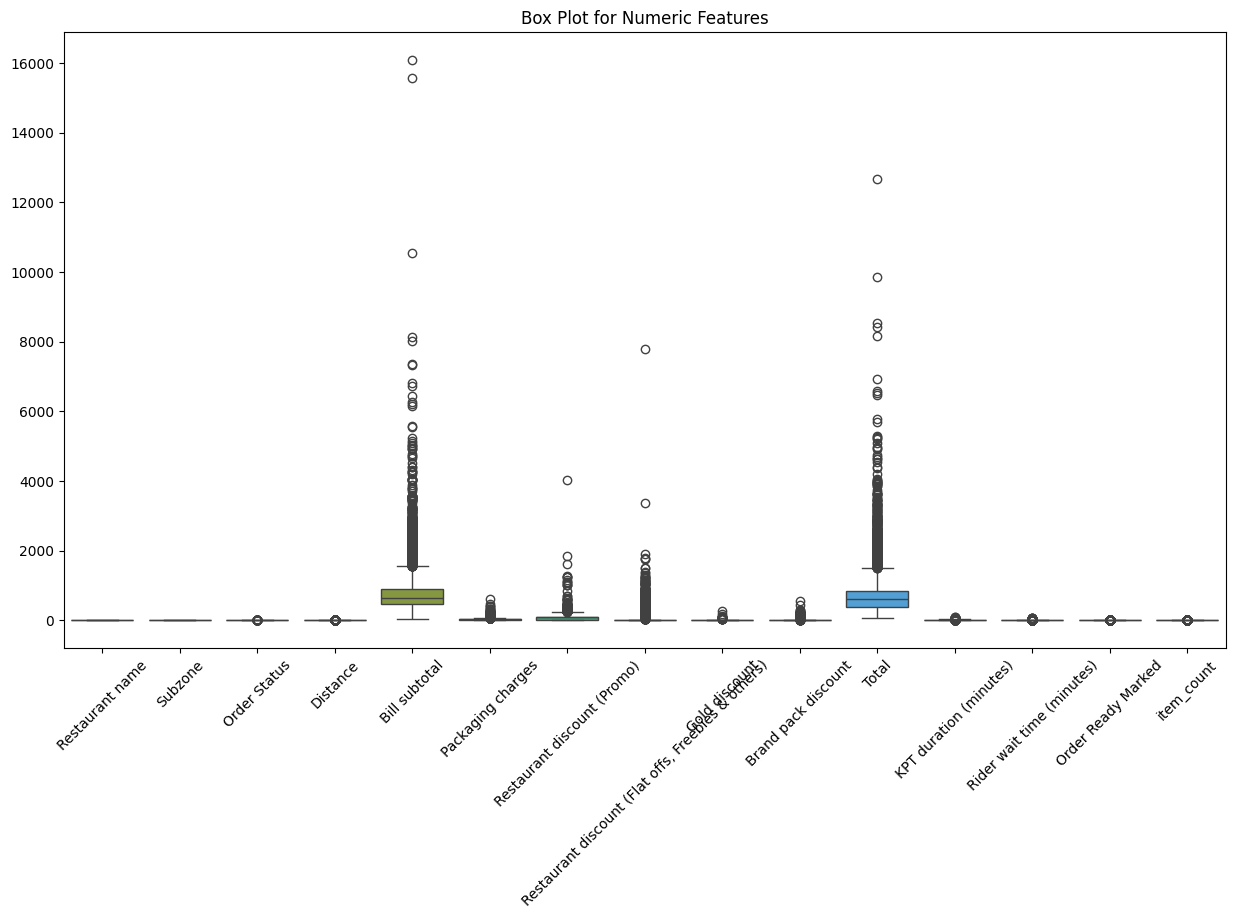

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols=df.select_dtypes(include=['float64','int64'])

# Create box plots
plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title('Box Plot for Numeric Features')
plt.show()


In [36]:
num_cols=df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col]=df[col].clip(lower,upper)

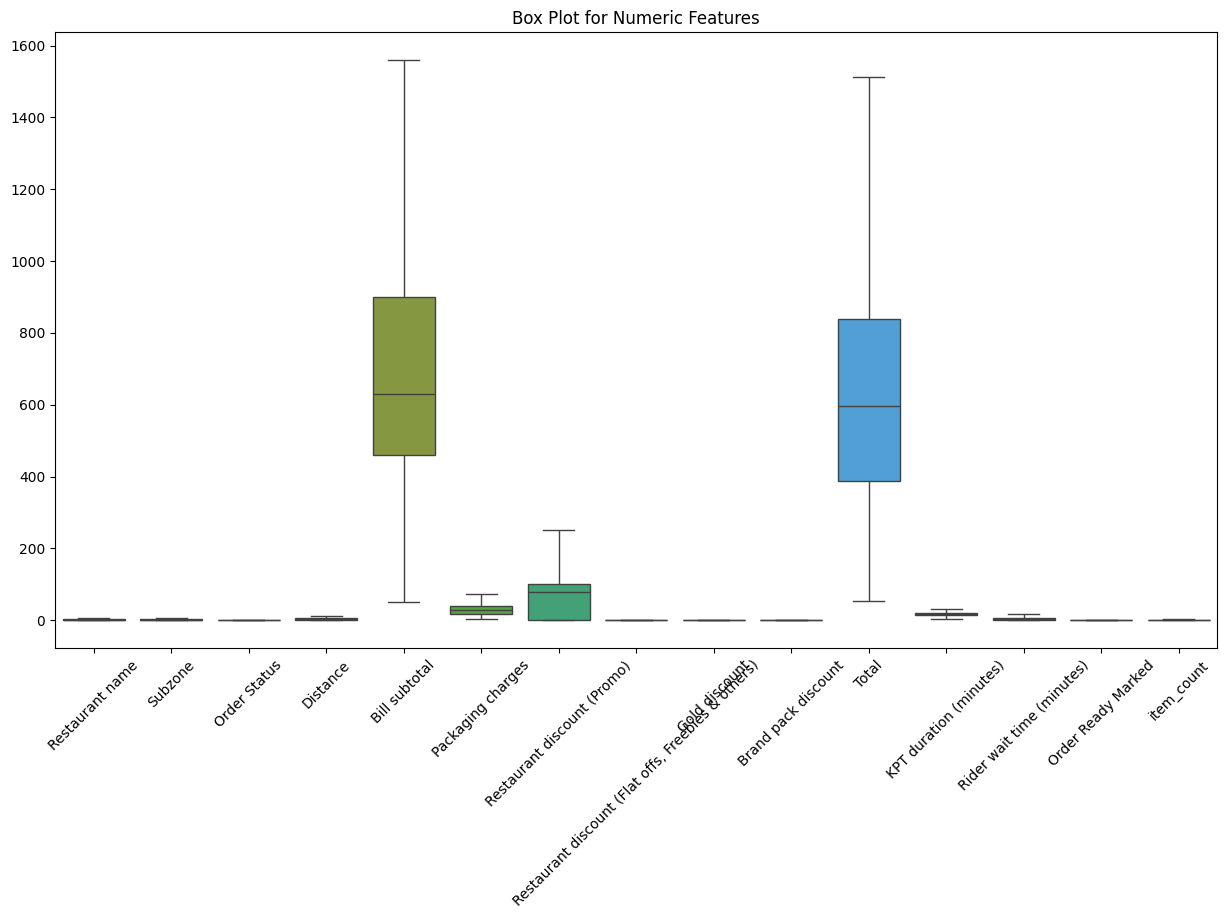

In [37]:
# Select only numeric columns
numeric_cols=df.select_dtypes(include=['float64','int64'])

# Create box plots
plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_cols)
plt.xticks(rotation=45)
plt.title('Box Plot for Numeric Features')
plt.show()


# ***Stage 2 : Model part***

# ***For Kitchen Preparation time (KPT)***

> Add blockquote



In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['KPT duration (minutes)'])
y=df['KPT duration (minutes)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from xgboost import XGBRegressor

kpt_model=XGBRegressor()
kpt_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=kpt_model.predict(X_test)
y_pred

array([12.68154 , 14.706086, 12.945074, ..., 18.385807, 12.159813,
       17.001263], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('RMSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))


RMSE: 15.917957339047218
R2 Score: 0.4297099785629067


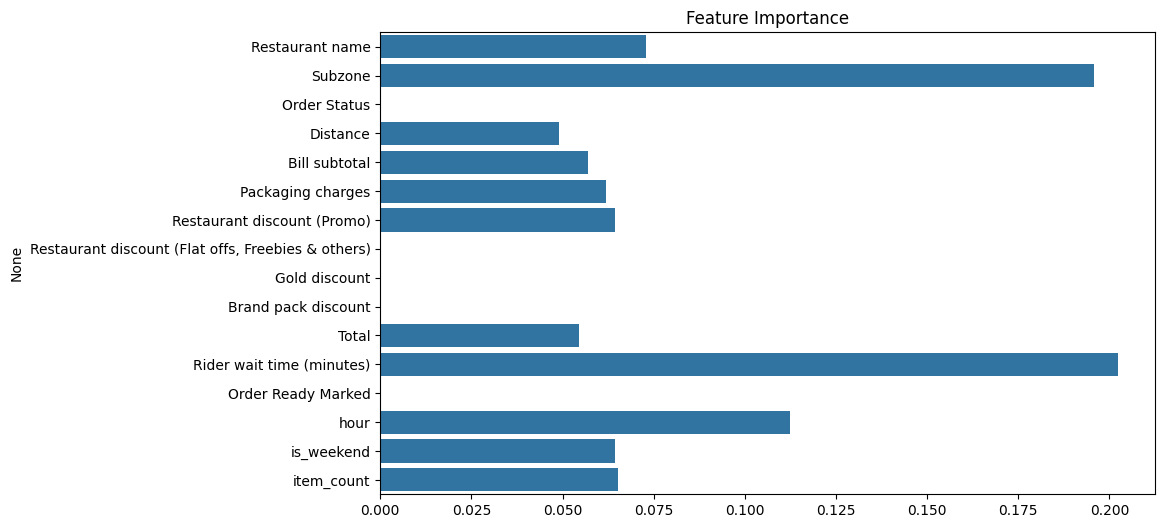

In [ ]:
importances=model.feature_importances_
features=X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances,y=features)
plt.title('Feature Importance')
plt.show()

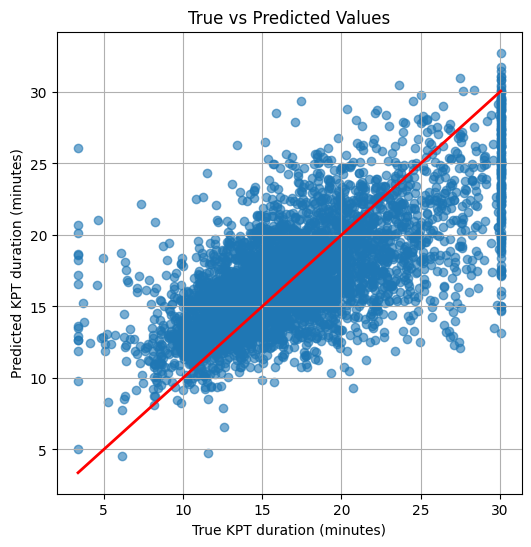

In [ ]:
# Scatter Plot: True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.xlabel('True KPT duration (minutes)')
plt.ylabel('Predicted KPT duration (minutes)')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',lw=2) # Perfect prediction line
plt.grid()
plt.show()


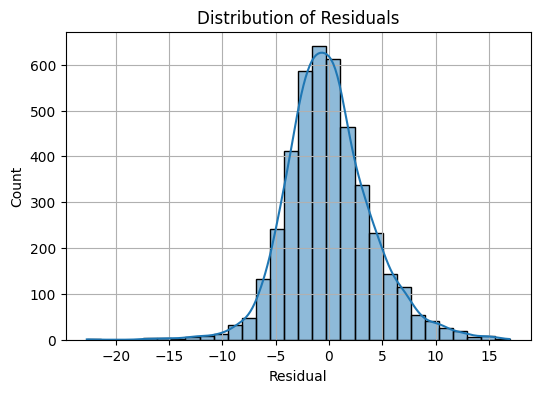

In [ ]:
# Residuals Plot
residuals=y_test-y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals,bins=30,kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.grid()
plt.show()


# *Hyper Paramater Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()

param_grid={
    'n_estimators':[100,150,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.7,1.0]
}

grid_search=GridSearchCV(estimator=xgb,
                         param_grid=param_grid,
                         cv=3,
                         scoring='neg_root_mean_squared_error',
                         verbose=1,
                         n_jobs=-1)

grid_search.fit(X_train,y_train)

print('Best Parameters:',grid_search.best_params_)
best_model=grid_search.best_estimator_


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}


In [ ]:
print('Tuned RMSE:',mean_squared_error(y_test,y_pred))
print('Tuned R2 Score:',r2_score(y_test,y_pred))

Tuned RMSE: 15.247444992643272
Tuned R2 Score: 0.45373231335498065


# ***For Delivery wait-time***

In [ ]:
X=df.drop('Rider wait time (minutes)',axis=1)
y=df['Rider wait time (minutes)']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rider_wait_model=XGBRegressor()
rider_wait_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=rider_wait_model.predict(X_test)
y_pred

array([12.695826 ,  2.2005658,  2.0572588, ...,  2.5297992,  5.90954  ,
        7.3157754], dtype=float32)

In [ ]:
print('RMSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

RMSE: 14.902723261412929
R2 Score: 0.2703599857010117


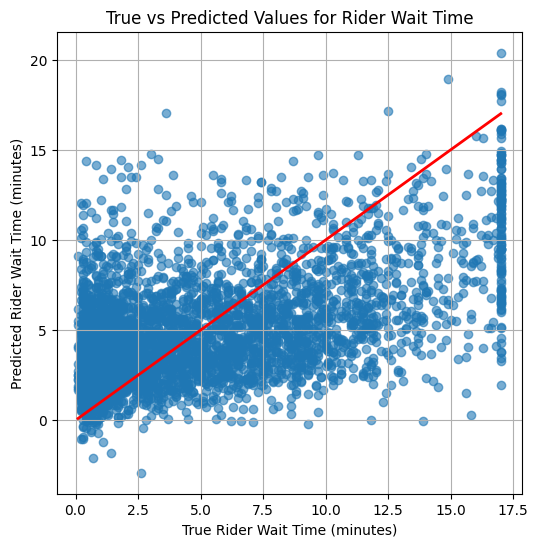

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.xlabel('True Rider Wait Time (minutes)')
plt.ylabel('Predicted Rider Wait Time (minutes)')
plt.title('True vs Predicted Values for Rider Wait Time')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',lw=2)
plt.grid()
plt.show()

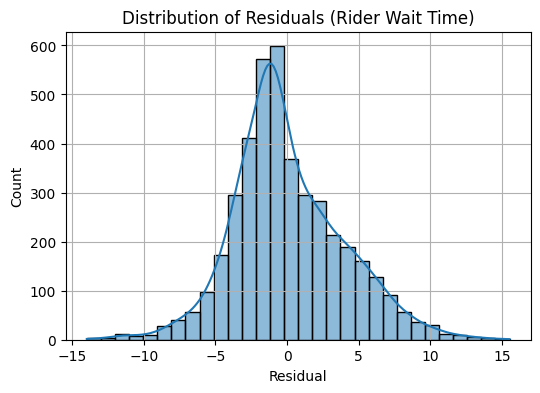

In [ ]:
# Residuals Plot
residuals=y_test-y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals,bins=30,kde=True)
plt.title('Distribution of Residuals (Rider Wait Time)')
plt.xlabel('Residual')
plt.grid()
plt.show()


# ***Multi-Target XGB Regressor***

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor


X=df.drop(['KPT duration (minutes)','Rider wait time (minutes)'],axis=1)
y=df[['KPT duration (minutes)','Rider wait time (minutes)']]  # Note: double [[ ]] for multiple columns


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
base_model=XGBRegressor()
multi_model=MultiOutputRegressor(base_model)
multi_model

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
multi_model.fit(X_train,y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
y_pred=multi_model.predict(X_test)
y_pred

array([[12.605401 ,  6.475182 ],
       [15.911892 ,  3.3361332],
       [14.758753 ,  5.5891147],
       ...,
       [18.362957 ,  2.217511 ],
       [14.346564 ,  8.731579 ],
       [14.966476 ,  4.340556 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print('KPT RMSE:',mean_squared_error(y_test.iloc[:,0],y_pred[:,0]))
print('KPT R2:',r2_score(y_test.iloc[:,0],y_pred[:,0]))

print('Wait Time RMSE:',mean_squared_error(y_test.iloc[:,1],y_pred[:,1]))
print('Wait Time R2:',r2_score(y_test.iloc[:,1],y_pred[:,1]))


KPT RMSE: 21.001576823538468
KPT R2: 0.2475799851826085
Wait Time RMSE: 19.769890051999376
Wait Time R2: 0.03206262324013498


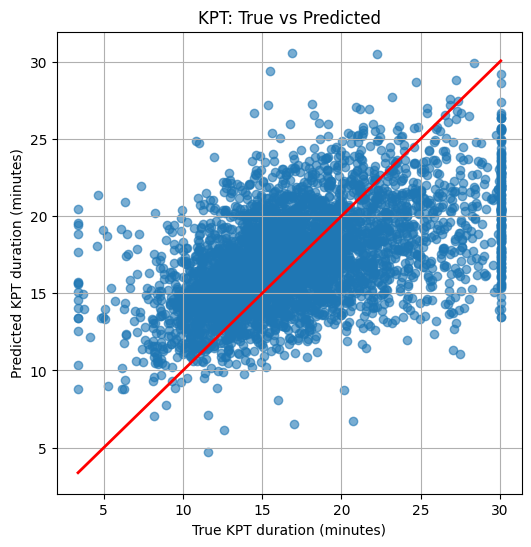

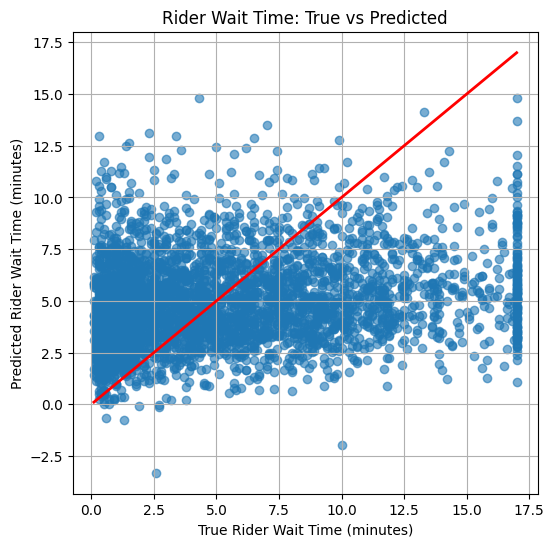

In [ ]:
# For KPT
plt.figure(figsize=(6,6))
plt.scatter(y_test.iloc[:,0],y_pred[:,0],alpha=0.6)
plt.xlabel('True KPT duration (minutes)')
plt.ylabel('Predicted KPT duration (minutes)')
plt.title('KPT: True vs Predicted')
plt.plot([y_test.iloc[:,0].min(),y_test.iloc[:,0].max()],[y_test.iloc[:,0].min(),y_test.iloc[:,0].max()],color='red',lw=2)
plt.grid()
plt.show()

# For Rider Wait Time
plt.figure(figsize=(6,6))
plt.scatter(y_test.iloc[:,1],y_pred[:,1],alpha=0.6)
plt.xlabel('True Rider Wait Time (minutes)')
plt.ylabel('Predicted Rider Wait Time (minutes)')
plt.title('Rider Wait Time: True vs Predicted')
plt.plot([y_test.iloc[:,1].min(),y_test.iloc[:,1].max()],[y_test.iloc[:,1].min(),y_test.iloc[:,1].max()],color='red',lw=2)
plt.grid()
plt.show()


In [ ]:
import pickle

# 1. Save KPT Model
with open('kpt_model.pkl','wb') as f:
    pickle.dump(kpt_model,f)

# 2. Save Rider Wait Time Model
with open('rider_wait_model.pkl','wb') as f:
    pickle.dump(rider_wait_model,f)

# 3. Save Multi-Output Model
with open('multi_output_model.pkl','wb') as f:
    pickle.dump(multi_model,f)

# *Customer Segmentation(Unsupervised)*

In [41]:
from sklearn.preprocessing import StandardScaler

features=[
    'Distance',
    'Bill subtotal',
    'Packaging charges',
    'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)',
    'Gold discount',
    'Brand pack discount',
    'Total',
    'item_count'
]


X=df[features].copy()

# Scale
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [42]:
from sklearn.cluster import KMeans

# Elbow method to find optimal clusters
inertia=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

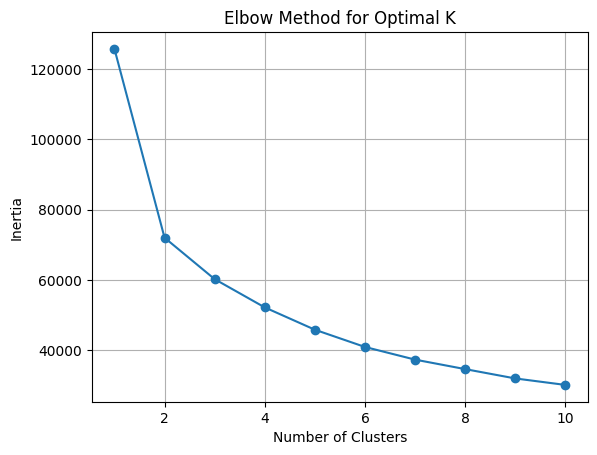

In [43]:
import matplotlib.pyplot as plt

# Plot
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [45]:
k=2
kmeans=KMeans(n_clusters=k,random_state=42)
df['Customer Segment']=kmeans.fit_predict(X_scaled)

In [46]:
df.groupby('Customer Segment')[features].mean().style.background_gradient(cmap='Blues')

,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,item_count
Customer Segment,,,,,,,,,
0,4.705411,1186.431221,52.828520,109.443524,0.000000,0.000000,0.000000,1107.822861,2.582733
1,3.888644,544.763799,23.287375,45.621247,0.000000,0.000000,0.000000,487.935448,1.419024


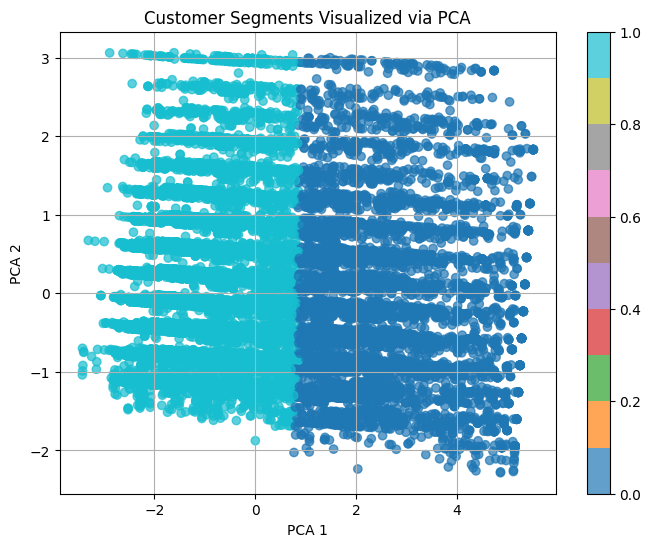

In [47]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['Customer Segment'],cmap='tab10',alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments Visualized via PCA')
plt.grid()
plt.colorbar()
plt.show()

<ipython-input-48-8174d95dbea0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Segment', data=df, palette='Set2')


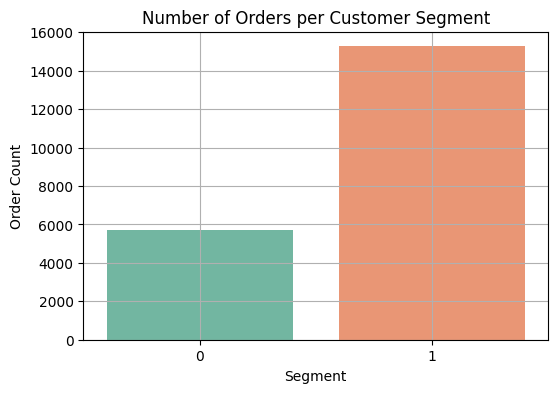

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Customer Segment', data=df, palette='Set2')
plt.title('Number of Orders per Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Order Count')
plt.grid(True)
plt.show()

<ipython-input-49-6d5fcf566433>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y='Total', data=df, palette='Pastel1')


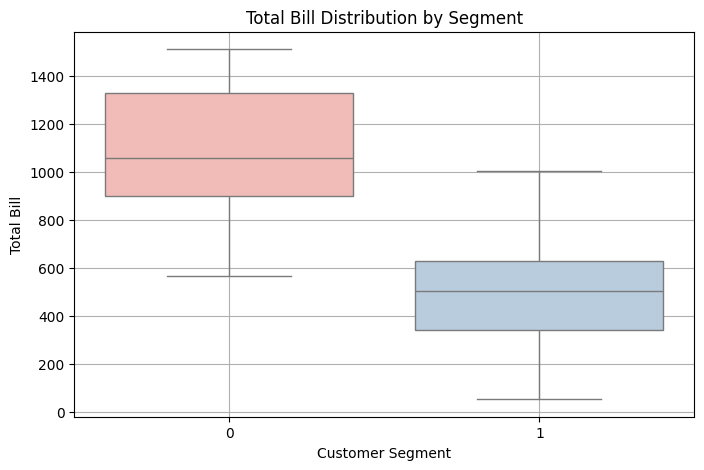

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Customer Segment', y='Total', data=df, palette='Pastel1')
plt.title('Total Bill Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Bill')
plt.grid(True)
plt.show()

<ipython-input-50-af0bd1651d11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y=col, data=df, palette='coolwarm')


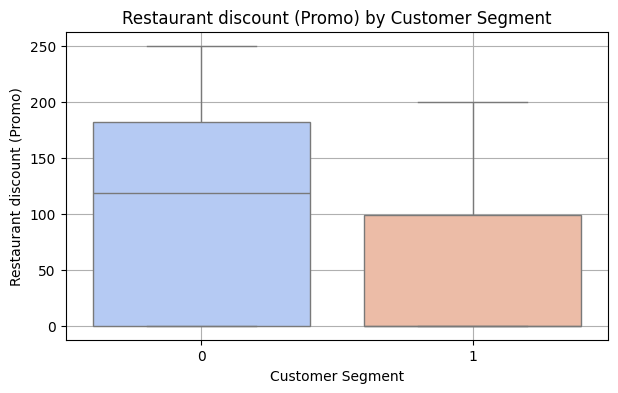

<ipython-input-50-af0bd1651d11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y=col, data=df, palette='coolwarm')


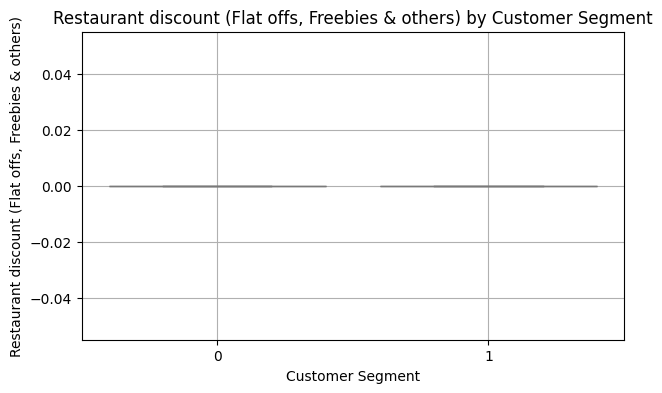

<ipython-input-50-af0bd1651d11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y=col, data=df, palette='coolwarm')


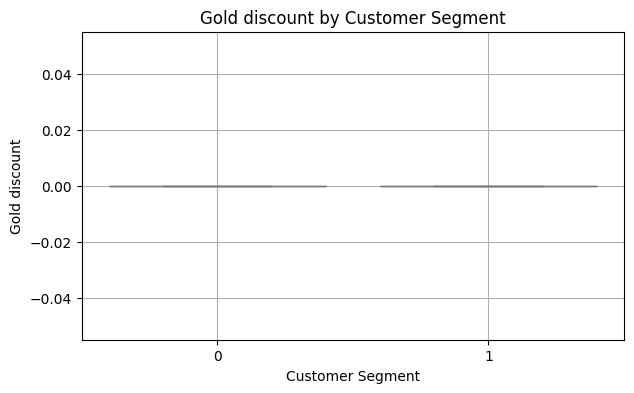

<ipython-input-50-af0bd1651d11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y=col, data=df, palette='coolwarm')


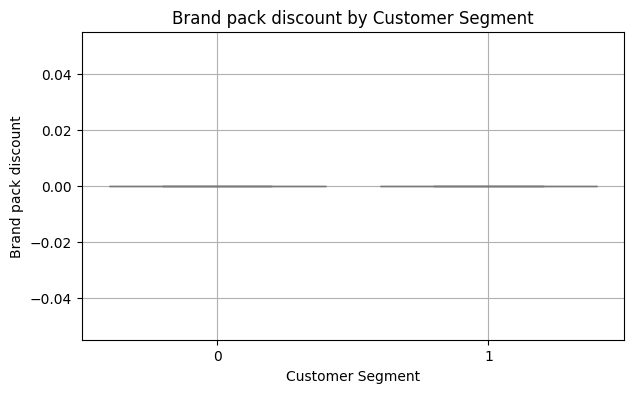

In [50]:
discount_cols=[
    'Restaurant discount (Promo)',
    'Restaurant discount (Flat offs, Freebies & others)',
    'Gold discount',
    'Brand pack discount'
]

for col in discount_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='Customer Segment', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by Customer Segment')
    plt.grid(True)
    plt.show()

<ipython-input-51-a8bc05f63430>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Customer Segment', y='item_count', data=df, palette='Set3')


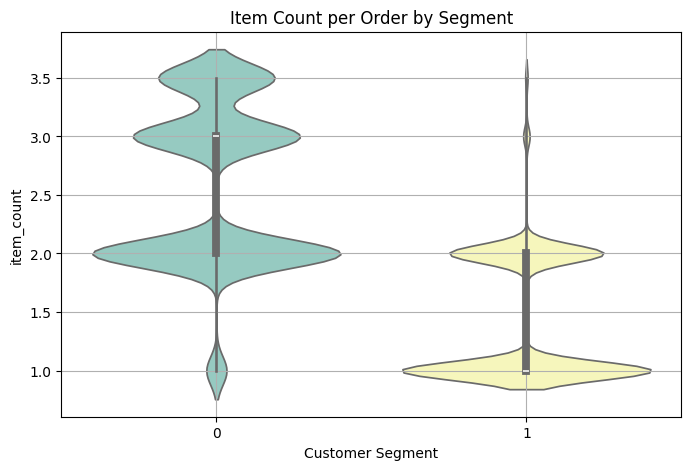

In [51]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Customer Segment', y='item_count', data=df, palette='Set3')
plt.title('Item Count per Order by Segment')
plt.grid(True)
plt.show()

In [58]:
segment_summary=df.groupby('Customer Segment')[
    ['Total','item_count','Distance','Bill subtotal',
     'Gold discount','Brand pack discount']
].mean().round(2)

display(segment_summary.style.background_gradient(cmap='Blues'))


,Total,item_count,Distance,Bill subtotal,Gold discount,Brand pack discount
Customer Segment,,,,,,
0,1107.820000,2.580000,4.710000,1186.430000,0.000000,0.000000
1,487.940000,1.420000,3.890000,544.760000,0.000000,0.000000


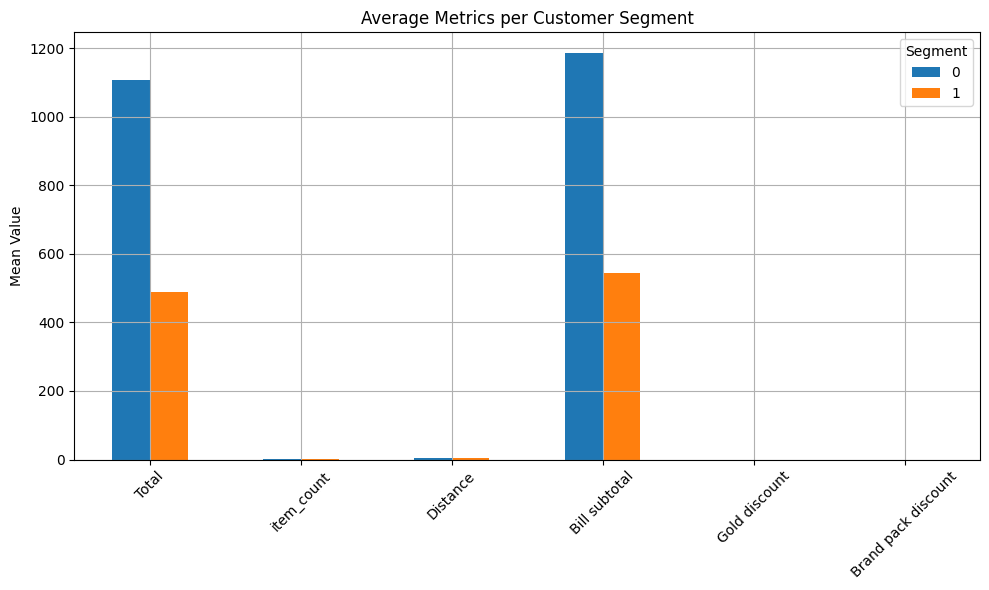

In [55]:
segment_summary.T.plot(kind='bar', figsize=(10,6), rot=45)
plt.title('Average Metrics per Customer Segment')
plt.ylabel('Mean Value')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [57]:
df['Segment Label'] = df['Customer Segment'].map({
    0: 'High-value/Bulk buyers',
    1: 'Small-frequent buyers'
})